In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import GCRCatalogs
import glob
from astropy import table

In [2]:
def collect_snana_outputs(path): #path may be single or list
    if type(path)==str:
        headfiles = sorted(glob.glob(path+ '*HEAD.FITS*'))
        photfiles = sorted(glob.glob(path+ '*PHOT.FITS*'))
    elif type(path)==list:
        headfiles = []
        photfiles = []
        for p in path:
            headfiles.extend(sorted(glob.glob(p+ '*HEAD.FITS*')))
            photfiles.extend(sorted(glob.glob(p+ '*HEAD.FITS*')))
            
    c=0
    for file in headfiles:
        if c==0:
            headfile = table.Table.read(file, format='fits').to_pandas()
        else:
            headfile=headfile.append(table.Table.read(file, format='fits').to_pandas())
        c+=1
    # phots = []
    # for file in photfiles:
    #     photfile = table.Table.read(file, format='fits').to_pandas()
    #     phots.append(photfile)
    #     print(len(photfile))
    # concat_phots = pd.concat(phots)
    return headfile

In [49]:
wgt = pd.read_csv("/global/cfs/cdirs/lsst/groups/SN/snana/SURVEYS/LSST/ROOT/PLASTICC_DEV/HOSTLIB/SNIb_GHOST_SNMAGSHIFT.WGTMAP", sep=' ', header=2) 

In [50]:
wgt.reindex()

,VARNAMES_WGTMAP:,LOGMASS,LOG_SFR,WGT,SNMAGSHIFT
0,WGT:,4.5,-8.0,0.000,0.0
1,WGT:,4.5,-7.8,0.000,0.0
2,WGT:,4.5,-7.6,0.000,0.0
3,WGT:,4.5,-7.4,0.000,0.0
4,WGT:,4.5,-7.2,0.000,0.0
...,...,...,...,...,...
106636,WGT:,12.5,1.2,31622.777,0.0
106637,WGT:,12.5,1.4,31622.777,0.0
106638,WGT:,12.5,1.6,31622.777,0.0
106639,WGT:,12.5,1.8,31622.777,0.0


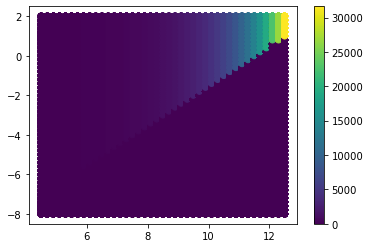

In [51]:
plt.scatter(wgt["LOGMASS"], wgt["LOG_SFR"], c=wgt["WGT"])
plt.colorbar()

In [17]:
hostlib = pd.read_csv("/global/cfs/cdirs/snana/SURVEYS/LSST/ROOT/HOSTLIB/SNIbc_GHOST.HOSTLIB", sep=' ', header=15)

<AxesSubplot:xlabel='LOGMASS', ylabel='LOG_SFR'>

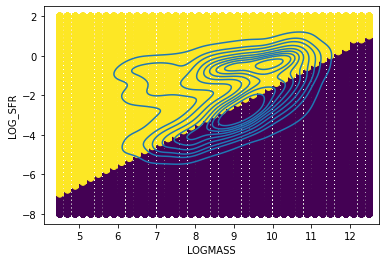

In [19]:
plt.scatter(wgt["LOGMASS"], wgt["LOG_SFR"], c=wgt["WGT"])
idx = np.random.choice(len(hostlib), replace=False, size=10000)
logm_h, sfr_h = hostlib['LOGMASS'][idx], hostlib['LOG_SFR'][idx]
sns.kdeplot(x=logm_h, y=sfr_h, label='SN Ibc HOSTLIB')


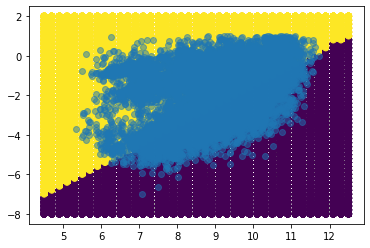

In [21]:
plt.scatter(wgt["LOGMASS"], wgt["LOG_SFR"], c=wgt["WGT"])
idx = np.random.choice(len(hostlib), replace=False, size=10000)
logm_h, sfr_h = hostlib['LOGMASS'][idx], hostlib['LOG_SFR'][idx]
plt.scatter(logm_h, sfr_h, label='SN Ibc HOSTLIB', alpha=.5)


In [52]:
path = "/global/cscratch1/sd/kessler/SNANA_LSST_SIM/"
ib_mosfit   = collect_snana_outputs(path+"MLAG_GP_zALL_MODEL811_SNIb_SNMAGSHIFT/")

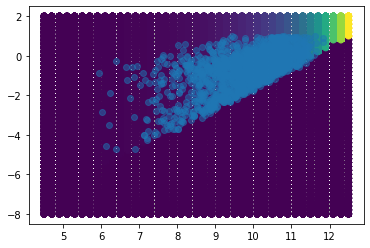

In [54]:
plt.scatter(wgt["LOGMASS"], wgt["LOG_SFR"], c=wgt["WGT"])
plt.scatter(ib_mosfit['SIM_HOSTLIB(LOGMASS_TRUE)'],ib_mosfit['SIM_HOSTLIB(LOG_SFR)'], alpha=.5)